In [ ]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from skimage import io
from os.path import expanduser
from tqdm import tqdm
HOME = expanduser("~")
import os, sys
import cv2
import skimage.exposure
import pandas as pd
%load_ext autoreload
%autoreload 2
import imutils

In [ ]:
sys.path.append("../..")
from utilities.utilities_mask import fix_thionin

In [ ]:
def merge_fix(infile, mask):
    imgfull = cv2.imread(infile)
    img_ch1 = imgfull[:, :, 0]
    img_ch2 = imgfull[:, :, 1]
    img_ch3 = imgfull[:, :, 2]
    fixed1 = cv2.bitwise_and(img_ch1, img_ch1, mask=mask)
    fixed2 = cv2.bitwise_and(img_ch2, img_ch2, mask=mask)
    fixed3 = cv2.bitwise_and(img_ch3, img_ch3, mask=mask)
    fixed = np.dstack((fixed1, fixed2, fixed3))
    return fixed

The following `merge_fix` function will mark the masked area with gray color.

In [ ]:
def merge_fix(infile, mask):
    imgfull = cv2.imread(infile)
    mask = 255 - mask
    mask = np.dstack((mask, mask, mask))
    imgfull = cv2.addWeighted(mask, 0.2, imgfull, 0.8, 0)
    return imgfull

### Testing masks with different levels of dilation for the brain MD589

In [ ]:
DIR = '/net/birdstore/Active_Atlas_Data/data_root/pipeline_data/MD589'
INPUT = os.path.join(DIR, 'preps', 'CH1', 'thumbnail')
CLEANED = os.path.join(DIR, 'preps', 'CH1', 'thumbnail_cleaned')
MASKED = os.path.join(DIR, 'preps', 'thumbnail_masked')
files = sorted(os.listdir(INPUT))

In [ ]:
len(files)

In [ ]:
plt.ioff()

In [ ]:
min_dilation = 0
max_dilation = 2
start = 0
end = len(files) # non-inclusive
num_dil = max_dilation - min_dilation + 1
num_pics = end - start

batch_size = 25

for batch in range(((num_pics-1) // batch_size)+1):
    b_start = start + batch * batch_size
    b_end = min(start + (batch+1)*batch_size, end)
    b_pics = b_end - b_start
    
    fig, ax = plt.subplots(nrows=b_pics, ncols=num_dil, sharex=False, sharey=False)
    plt.style.use('classic')
    fig.set_size_inches(np.array([num_dil * 8, b_pics * 6]), forward=False)

    for i, file in enumerate(tqdm(files[b_start:b_end])):
        infile = os.path.join(INPUT, file)
        src = cv2.imread(infile, cv2.IMREAD_GRAYSCALE)
        for j, dil in enumerate(range(min_dilation, max_dilation+1)):
            mask = fix_thionin(src, dilation_itr=dil, bg_mask=True, debug=True)
            fixed = merge_fix(infile, mask)
            ax[i, j].set_title(f'image {file}, dilation {dil}')
            ax[i, j].imshow(fixed, cmap="gray")

    plt.tight_layout()
    plt.savefig(f'mask_comparison/MD589_debug_bgmask_{b_start}_{b_end - 1}.png')


In [ ]:
min_dilation = 0
max_dilation = 2
start = 0
end = len(files) # non-inclusive
num_dil = max_dilation - min_dilation + 1
num_pics = end - start

batch_size = 25

for batch in range(((num_pics-1) // batch_size)+1):
    b_start = start + batch * batch_size
    b_end = min(start + (batch+1)*batch_size, end)
    b_pics = b_end - b_start
    
    fig, ax = plt.subplots(nrows=b_pics, ncols=num_dil, sharex=False, sharey=False)
    plt.style.use('classic')
    fig.set_size_inches(np.array([num_dil * 8, b_pics * 6]), forward=False)

    for i, file in enumerate(tqdm(files[b_start:b_end])):
        infile = os.path.join(INPUT, file)
        src = cv2.imread(infile, cv2.IMREAD_GRAYSCALE)
        for j, dil in enumerate(range(min_dilation, max_dilation+1)):
            mask = fix_thionin(src, dilation_itr=dil, bg_mask=True, debug=False)
            fixed = merge_fix(infile, mask)
            ax[i, j].set_title(f'image {file}, dilation {dil}')
            ax[i, j].imshow(fixed, cmap="gray")

    plt.tight_layout()
    plt.savefig(f'mask_comparison/MD589_bgmask_{b_start}_{b_end - 1}.png')


In [ ]:
min_dilation = 0
max_dilation = 2
start = 0
end = len(files) # non-inclusive
num_dil = max_dilation - min_dilation + 1
num_pics = end - start

batch_size = 25

for batch in range(((num_pics-1) // batch_size)+1):
    b_start = start + batch * batch_size
    b_end = min(start + (batch+1)*batch_size, end)
    b_pics = b_end - b_start
    
    fig, ax = plt.subplots(nrows=b_pics, ncols=num_dil, sharex=False, sharey=False)
    plt.style.use('classic')
    fig.set_size_inches(np.array([num_dil * 8, b_pics * 6]), forward=False)

    for i, file in enumerate(tqdm(files[b_start:b_end])):
        infile = os.path.join(INPUT, file)
        src = cv2.imread(infile, cv2.IMREAD_GRAYSCALE)
        for j, dil in enumerate(range(min_dilation, max_dilation+1)):
            mask = fix_thionin(src, dilation_itr=dil, bg_mask=False, debug=False)
            fixed = merge_fix(infile, mask)
            ax[i, j].set_title(f'image {file}, dilation {dil}')
            ax[i, j].imshow(fixed, cmap="gray")

    plt.tight_layout()
    plt.savefig(f'mask_comparison/MD589_{b_start}_{b_end - 1}.png')


### Testing masks with different levels of dilation for the brain DK54

In [ ]:
DIR = '/net/birdstore/Active_Atlas_Data/data_root/pipeline_data/DK54'
INPUT = os.path.join(DIR, 'preps', 'CH1', 'thumbnail')
CLEANED = os.path.join(DIR, 'preps', 'CH1', 'thumbnail_cleaned')
MASKED = os.path.join(DIR, 'preps', 'thumbnail_masked')
files = sorted(os.listdir(INPUT))

In [ ]:
min_dilation = 0
max_dilation = 2
start = 0
end = len(files) # non-inclusive
num_dil = max_dilation - min_dilation + 1
num_pics = end - start

batch_size = 25

for batch in range(((num_pics-1) // batch_size)+1):
    b_start = start + batch * batch_size
    b_end = min(start + (batch+1)*batch_size, end)
    b_pics = b_end - b_start
    
    fig, ax = plt.subplots(nrows=b_pics, ncols=num_dil, sharex=False, sharey=False)
    plt.style.use('classic')
    fig.set_size_inches(np.array([num_dil * 8, b_pics * 6]), forward=False)

    for i, file in enumerate(tqdm(files[b_start:b_end])):
        infile = os.path.join(INPUT, file)
        src = cv2.imread(infile, cv2.IMREAD_GRAYSCALE)
        src = cv2.bitwise_not(src)
        for j, dil in enumerate(range(min_dilation, max_dilation+1)):
            mask = fix_thionin(src, dilation_itr=dil, debug=True)
            fixed = merge_fix(infile, mask)
            ax[i, j].set_title(f'image {file}, dilation {dil}')
            ax[i, j].imshow(fixed, cmap="gray")

    plt.tight_layout()
    plt.savefig(f'mask_comparison/DK54_{b_start}_{b_end - 1}.png')

In [ ]:
infile = os.path.join(INPUT, files[250])
image = cv2.imread(infile, cv2.IMREAD_GRAYSCALE)
image = cv2.bitwise_not(image)
gray = cv2.GaussianBlur(image, (3, 3), 0)

In [ ]:
plt.figure(figsize=(18,18))
plt.imshow(gray, cmap="gray")
plt.axis('off')
plt.show()

### Previous work done by Ed

100%|██████████| 10/10 [00:00<00:00, 21.53it/s]


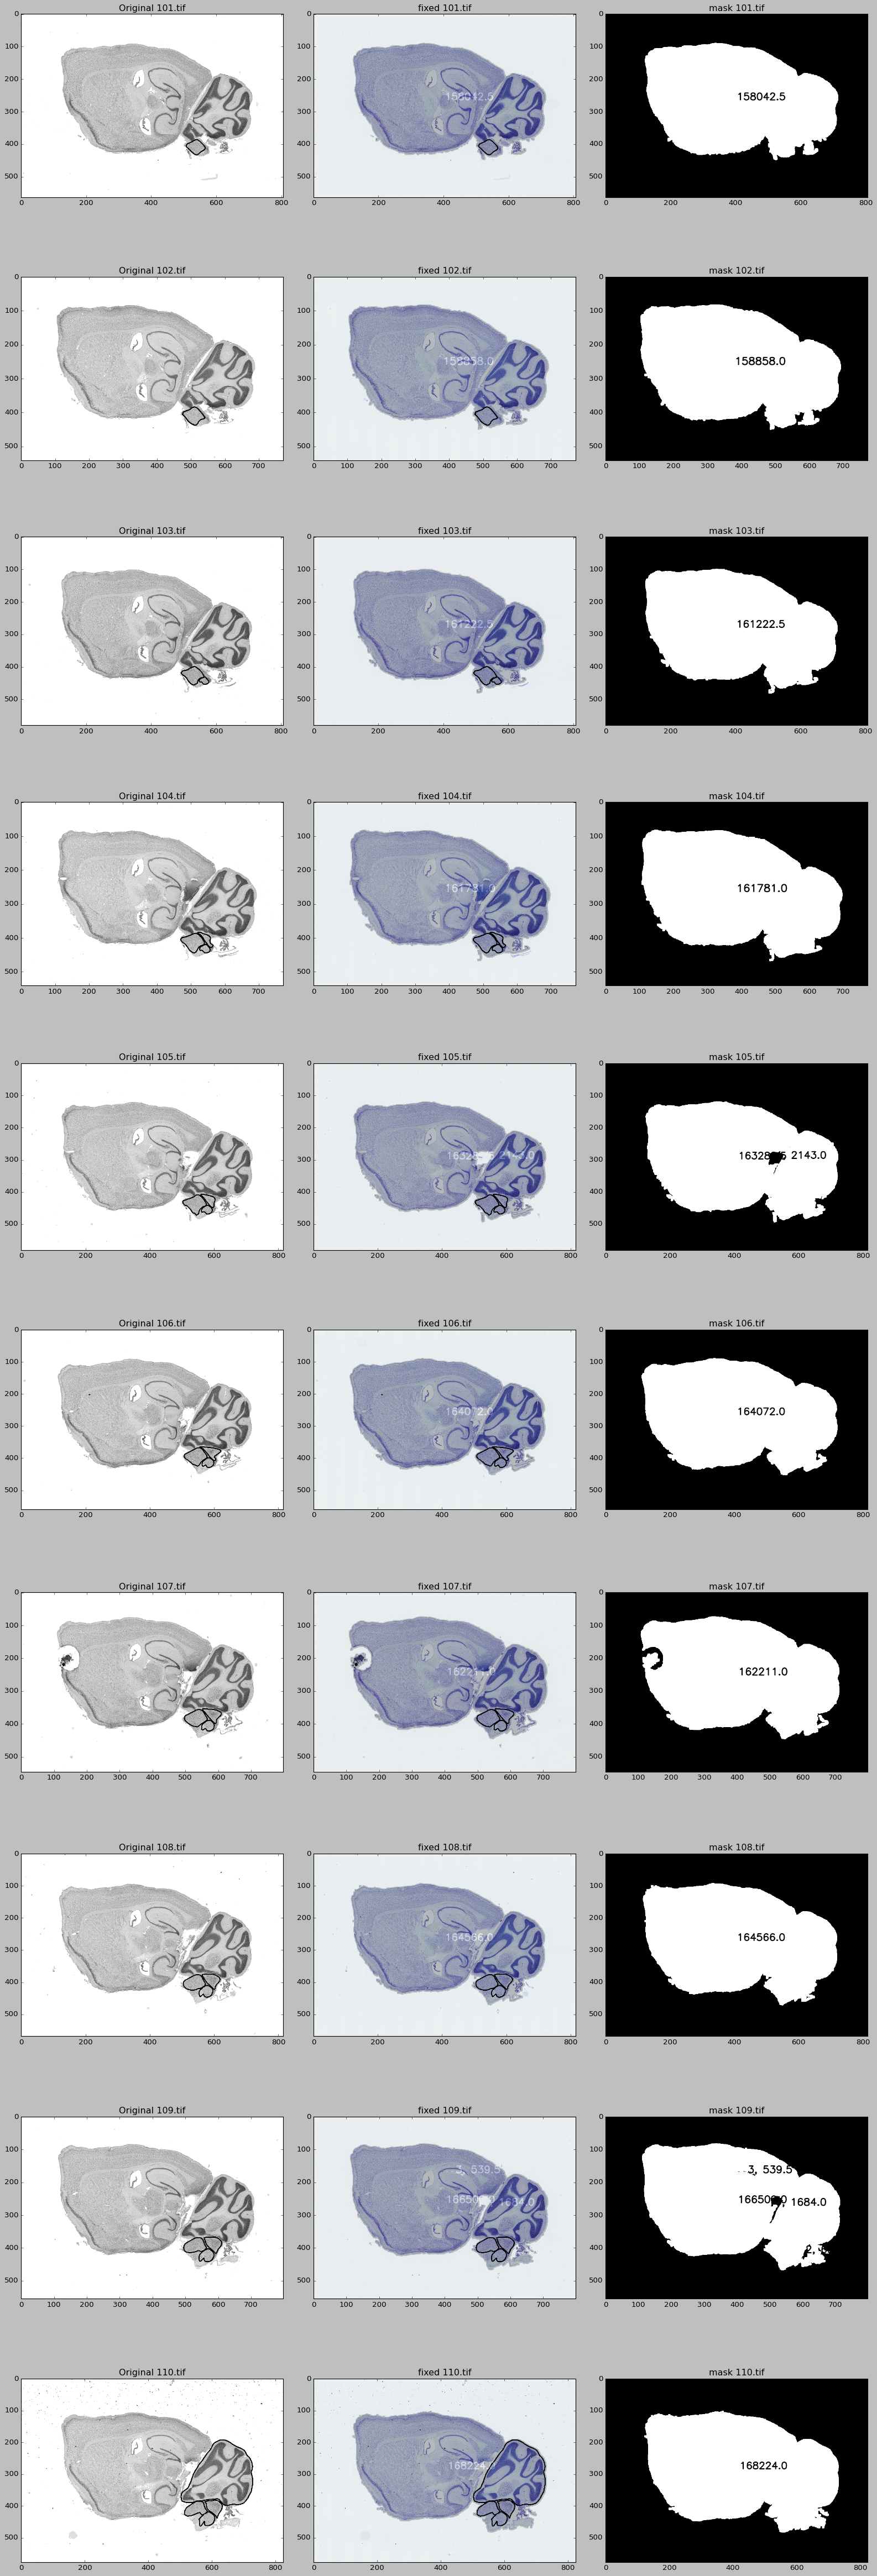

In [13]:
##### get oriented for comparison

img_inputs = []
img_outputs = []
file_inputs = []
masks = []

start, finish = (100,110)

    

# for i, file in enumerate(tqdm(files[start:finish])):
for i, file in enumerate(tqdm(files[start:finish])):
    infile = os.path.join(INPUT, file)
    src = cv2.imread(infile, cv2.IMREAD_GRAYSCALE)
    mask = fix_thionin(src, debug=True, bg_mask=True)
    fixed = merge_fix(infile, mask)
    img_inputs.append(src)    
    file_inputs.append(file)        
    masks.append(mask)
    img_outputs.append(fixed)
        

fig, ax = plt.subplots(nrows=len(masks), ncols=3, sharex=False, sharey=False)
plt.style.use('classic')
i = 0
for filein, fileout, mask, name in zip(img_inputs, img_outputs, masks, file_inputs):
    ax[i,0].set_title('Original {}'.format(name))
    ax[i,0].imshow(filein, cmap="gray")
    ax[i,1].set_title('fixed {}'.format(name))
    ax[i,1].imshow(fileout, cmap="gray")
    ax[i,2].set_title('mask {}'.format(name))
    ax[i,2].imshow(mask, cmap="gray")

    i += 1

fig.set_size_inches(np.array([20, 6 * len(masks)]), forward=False)
plt.tight_layout()
plt.show()
